# Bitconnect Price

by: Widya Meiriska

### 1. Read Dataset

In [2]:
import csv
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/raw/bitcoin/bitconnect_price.csv', parse_dates = ['Date'])

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
224,2017-01-24,0.152959,0.671748,0.134264,0.142972,"33,237","766,670"
225,2017-01-23,0.128182,0.156983,0.126968,0.154695,"6,921","641,762"
226,2017-01-22,0.174903,0.178088,0.123697,0.128067,526,"874,666"
227,2017-01-21,0.145710,0.236289,0.144554,0.174829,"12,872","727,753"
228,2017-01-20,0.162671,0.166808,0.145625,0.145625,"5,978","812,236"


### 2. Data Investigation

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.count()

Date          229
Open          229
High          229
Low           229
Close         229
Volume        229
Market Cap    229
dtype: int64

In [6]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

#### There is no missing data here but there are several data which have different format. Some of the data do not use number format.

In [6]:
# Change object to format number
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
Date          229 non-null datetime64[ns]
Open          229 non-null float64
High          229 non-null float64
Low           229 non-null float64
Close         229 non-null float64
Volume        229 non-null float64
Market Cap    229 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.6 KB


In [11]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
# Cek missing data
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Market Cap,0,0.0


In [13]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,229.000000,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02
mean,33.210547,35.490599,31.128843,33.802779,2.030768e+06,2.152792e+08
std,38.957075,41.423524,36.480761,39.482488,3.041031e+06,2.541095e+08
min,0.128182,0.156983,0.123697,0.128067,5.260000e+02,6.417620e+05
25%,1.830000,1.990000,1.760000,1.860000,2.311930e+05,1.043130e+07
50%,10.070000,10.840000,9.700000,10.180000,7.376190e+05,6.253950e+07
75%,55.520000,58.860000,53.220000,55.530000,2.865970e+06,3.685020e+08
max,141.110000,149.890000,133.470000,140.970000,3.039560e+07,9.269180e+08


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [10]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Market Cap')

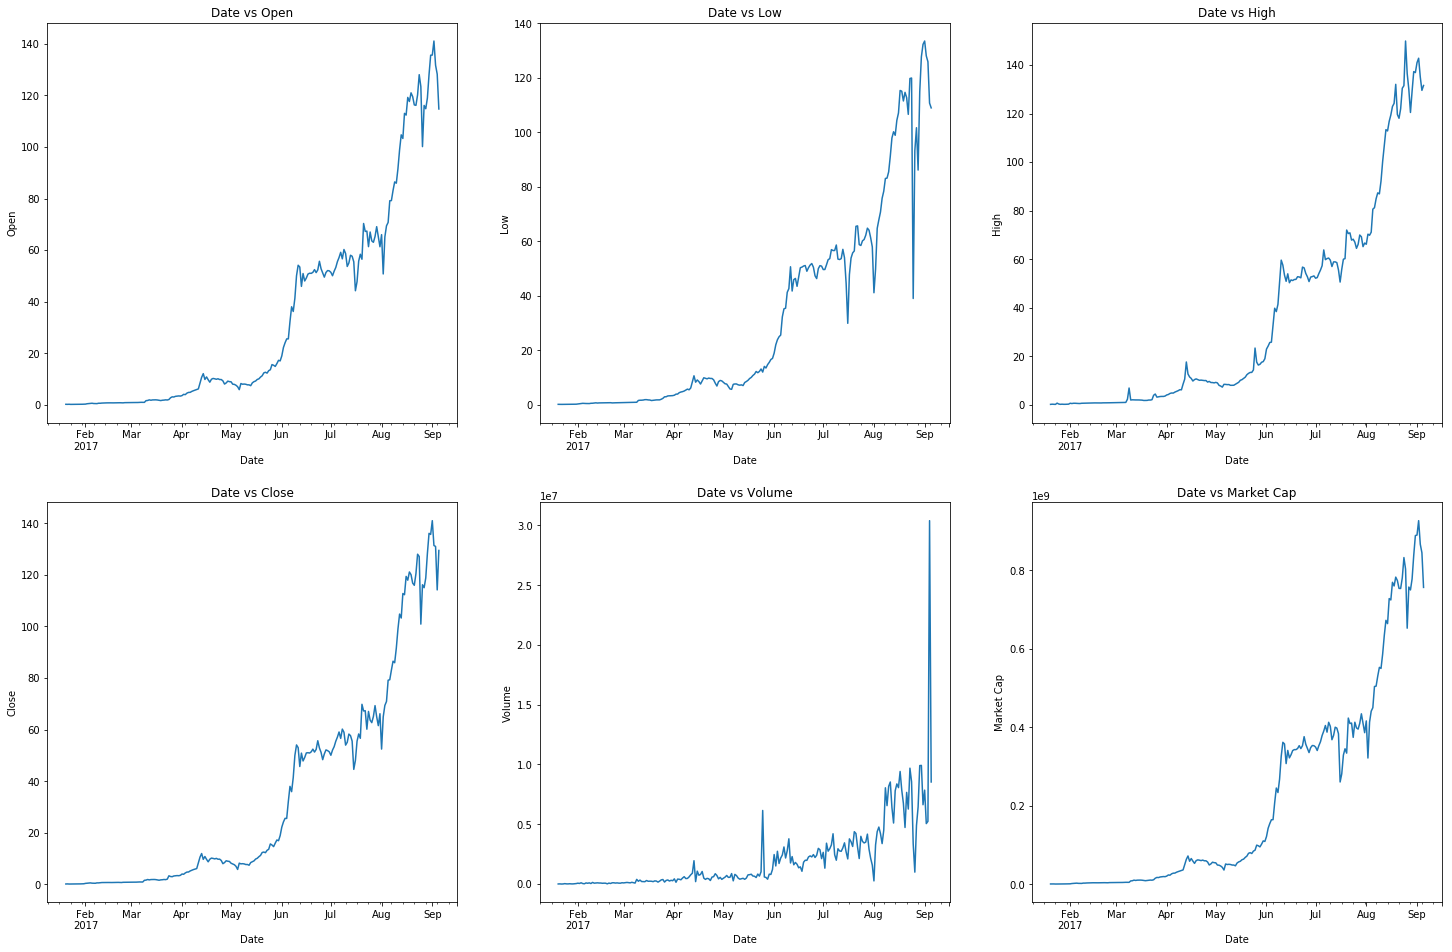

In [18]:
# Visualization the average of Open based on time (Week)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,5)
plt.ylabel('Volume')
df.Volume.plot()
plt.title('Date vs Volume')

plt.subplot(3,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()
plt.title('Date vs Market Cap')